This  Notebook will attempts to isolate Word Embeddings dimension coding for ** nomber information** (Singular/Plural) in a sample of Word Embeddings for **common Nouns**, and try to analysis which vectors might encode Singular and Plural Noun information.

In [66]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [67]:

top_freq_n = pd.read_csv('Most Frequent Words/top_frequent_NOUN_FlauBERT.csv', index_col='Word')
top_freq_n

,Unnamed: 0,lemme,cgram,genre,nombre,freqlemlivres
Word,,,,,,
homme,0,homme,NOM,m,s,1398.85
hommes,1,homme,NOM,m,p,1398.85
jour,2,jour,NOM,m,s,1341.76
jours,3,jour,NOM,m,p,1341.76
oeil,5,oeil,NOM,m,s,1234.59
...,...,...,...,...,...,...
éthylène,48267,éthylène,NOM,m,s,0.00
étiquetage,48269,étiquetage,NOM,m,s,0.00
évangélisation,48274,évangélisation,NOM,f,s,0.00


1000 Singular Nouns

In [68]:

top_sg_n = top_freq_n[top_freq_n["nombre"] == "s"][:1000]
top_sg_n

,Unnamed: 0,lemme,cgram,genre,nombre,freqlemlivres
Word,,,,,,
homme,0,homme,NOM,m,s,1398.85
jour,2,jour,NOM,m,s,1341.76
oeil,5,oeil,NOM,m,s,1234.59
main,8,main,NOM,NaN,s,1229.39
chose,11,chose,NOM,f,s,1057.64
...,...,...,...,...,...,...
muscle,2172,muscle,NOM,m,s,34.53
écart,2174,écart,NOM,m,s,34.53
acier,2176,acier,NOM,m,s,34.46


1000 Plural Nouns

In [69]:
top_pl_n = top_freq_n[top_freq_n["nombre"] == "p"][:1000]
top_pl_n

,Unnamed: 0,lemme,cgram,genre,nombre,freqlemlivres
Word,,,,,,
hommes,1,homme,NOM,m,p,1398.85
jours,3,jour,NOM,m,p,1341.76
mains,9,main,NOM,f,p,1229.39
fois,10,fois,NOM,f,p,1140.00
choses,12,chose,NOM,f,p,1057.64
...,...,...,...,...,...,...
bougies,2518,bougie,NOM,f,p,29.86
paliers,2526,palier,NOM,m,p,29.80
comédies,2528,comédie,NOM,f,p,29.73


In [70]:
all_n_we = pd.read_csv('all_nouns_we.csv', index_col=0)
sg_n_we = all_n_we.merge(top_sg_n, left_index=True, right_index=True)
pl_n_we = all_n_we.merge(top_pl_n, left_index=True, right_index=True)

In [71]:
sg_n_we

,0,1,2,3,4,5,6,7,8,9,...,510,511,gn,gender,Unnamed: 0,lemme,cgram,genre,nombre,freqlemlivres
abri,5.471711,-4.372995,1.739335,-4.412735,4.930413,-8.995445,2.661912,0.189424,4.682540,-1.069355,...,5.668764,-2.120574,singular,masculine,1272,abri,NOM,m,s,56.76
absence,3.322297,-0.768149,3.555035,-0.685460,1.201102,-3.151831,-3.592423,1.189369,-2.742928,-2.666739,...,5.123568,-2.381779,singular,feminine,931,absence,NOM,f,s,76.28
accent,-1.783984,-0.983782,2.905572,-3.458411,-1.267276,-3.330925,-2.833155,6.685886,2.322869,1.045544,...,4.514214,-5.526344,singular,masculine,1632,accent,NOM,m,s,45.54
accident,4.179721,2.913542,1.124980,2.269820,0.573966,-3.254911,-2.611606,-1.138910,5.944216,-1.380369,...,5.891779,-3.223269,singular,masculine,1676,accident,NOM,m,s,44.80
accord,-0.732188,-2.024965,1.674970,-4.194049,-2.528312,-2.400746,-4.672920,0.374903,6.015941,-0.066068,...,-5.424189,-6.660925,singular,masculine,442,accord,NOM,m,s,136.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
été,3.416338,-0.773585,1.706465,-0.731093,-2.286620,-4.172235,0.249760,2.382637,-0.532811,-1.754951,...,4.555850,-4.830541,singular,masculine,497,été,NOM,m,s,125.47
évidence,3.323571,1.512269,5.297979,-0.080244,-1.670055,-3.890020,-4.678585,1.379389,-0.347799,-1.198223,...,3.639242,-3.688165,singular,feminine,1885,évidence,NOM,f,s,39.93
événement,-0.693584,-0.753810,0.124109,2.200120,1.585398,-2.354075,-2.994415,1.552121,4.762497,-1.361055,...,0.740749,-3.701469,singular,masculine,800,événement,NOM,m,s,84.59
être,0.166950,-1.121742,3.855680,0.846314,-3.065409,0.577782,1.696410,0.962429,1.131322,-5.577701,...,1.669239,-4.337866,singular,masculine,513,être,NOM,m,s,122.57


In [72]:
pl_n_we

,0,1,2,3,4,5,6,7,8,9,...,510,511,gn,gender,Unnamed: 0,lemme,cgram,genre,nombre,freqlemlivres
abris,3.634584,-4.644015,0.377342,-6.514875,1.314781,-7.105865,1.637559,1.284117,2.511964,1.558493,...,5.123267,0.749750,plural,masculine,1273,abri,NOM,m,p,56.76
absences,3.295355,-0.794079,2.472845,3.223941,5.035848,-4.848855,-4.557629,-2.719433,-1.932022,-6.440993,...,5.919082,0.577700,plural,feminine,932,absence,NOM,f,p,76.28
accents,-2.852492,-6.941010,2.654853,0.080606,2.219124,0.272673,-6.729390,6.506963,-2.533498,-0.707858,...,0.470607,-1.465352,plural,masculine,1633,accent,NOM,m,p,45.54
accidents,2.268600,4.139071,0.183023,3.481640,0.530478,-3.582917,0.113348,-3.074070,3.846386,-0.874110,...,4.060133,-2.090280,plural,masculine,1677,accident,NOM,m,p,44.80
accords,1.037610,-0.246123,3.333316,-4.094496,0.056898,-2.978131,-4.198946,-2.159259,3.082677,2.101236,...,-5.254343,-6.959417,plural,masculine,443,accord,NOM,m,p,136.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
étudiants,3.238430,-4.186950,3.466894,0.049728,-6.309442,-8.333128,1.362076,3.088547,1.290309,-0.169715,...,1.396118,-3.539086,plural,masculine,1949,étudiant,NOM,m,p,38.45
étés,2.757932,0.903210,0.184015,1.369026,-0.241391,-3.674196,0.942077,-0.553418,-1.468072,-2.633826,...,1.823255,-2.487086,plural,masculine,498,été,NOM,m,p,125.47
événements,-1.245101,-0.820061,1.330310,5.786696,3.966537,-3.242018,-0.265572,2.159446,0.661078,-0.936386,...,1.265242,1.124227,plural,masculine,801,événement,NOM,m,p,84.59
êtres,3.589590,-4.551544,6.088149,2.847501,3.829500,-3.342109,2.749030,-0.169812,1.994654,0.893699,...,0.167977,-1.285041,plural,masculine,514,être,NOM,m,p,122.57


In [73]:
dim_indices = range(512)
avg_values_sg = [sg_n_we[str(i)].mean() for i in dim_indices]
avg_values_pl = [pl_n_we[str(i)].mean() for i in dim_indices]
d = [abs(s-p) for s,p in zip(avg_values_sg, avg_values_pl)]
diff={d[i]:i for i in dim_indices}

sg_avg = pd.DataFrame([avg_values_sg], index=["sg_avg"], columns=dim_indices)
pl_avg = pd.DataFrame([avg_values_pl], index=["pl_avg"], columns=dim_indices)


In [74]:
sg_avg 

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
sg_avg,2.601957,-1.807742,0.619541,-1.778036,0.670534,-2.731147,-2.613026,0.167918,1.391258,0.49421,...,-1.117636,0.695403,0.358586,-2.513595,-0.355353,-4.083591,-3.155055,-3.554188,1.66638,-3.015085


In [75]:
pl_avg 

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
pl_avg,2.055555,-1.257942,0.442833,0.116288,1.386727,-3.749978,-2.406069,-0.646846,0.099718,0.20298,...,-1.603712,0.646049,1.028271,-1.802236,-1.143349,-2.59853,-3.238867,-3.207549,1.682263,-1.457299


In [76]:
diff

{0.546401389443484: 0,
 0.5498003577268014: 1,
 0.1767074417295465: 2,
 1.8943241294386828: 3,
 0.7161930632079411: 4,
 1.0188308633363885: 5,
 0.20695643561576604: 6,
 0.8147644082449768: 7,
 1.2915402254961372: 8,
 0.2912301421122643: 9,
 0.1303916505297913: 10,
 0.3314422128734975: 11,
 0.5904375725706308: 12,
 0.8597344217943599: 13,
 0.0035446135943584256: 14,
 0.604948885833411: 15,
 0.33776401989208116: 16,
 0.4419632075201849: 17,
 0.843169796619414: 18,
 0.9719992379120428: 19,
 0.016340001885609468: 20,
 1.3412619839370186: 21,
 0.9340386902742484: 22,
 0.35378773873595026: 23,
 0.7485027102251196: 24,
 0.9343719237614279: 25,
 0.5412670256914804: 26,
 0.5068491447644853: 27,
 0.4613673908720836: 28,
 0.12441212610764918: 29,
 0.26389573450096554: 30,
 0.4229683782755781: 31,
 0.46042576409499514: 32,
 0.3927731890975563: 33,
 0.1164006285860142: 34,
 0.19682278870107428: 35,
 0.11224585417229482: 36,
 1.078400461177274: 37,
 0.061161604707702696: 38,
 0.0682978505899019: 39,

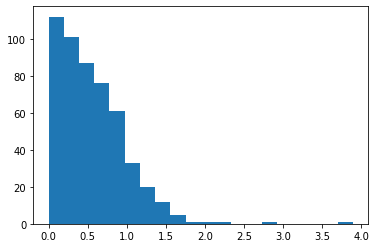

In [77]:
from matplotlib import pyplot as plt 
plt.hist(d, bins=20)
plt.show()

In [78]:
d.sort(reverse=True)
d

[3.891695213894941,
 2.725862278762511,
 2.292172058910911,
 1.9677215817332097,
 1.8943241294386828,
 1.7284977498746914,
 1.6672878606879797,
 1.6585721513390301,
 1.579381912438917,
 1.5577854161032965,
 1.5369562292951193,
 1.5157175300073709,
 1.492835692280799,
 1.4926627110589905,
 1.4850603652921421,
 1.4573339392853164,
 1.454186397169792,
 1.446470194318132,
 1.4170991466947398,
 1.4133955102857725,
 1.3930718758126424,
 1.3693073059330791,
 1.3614448506637995,
 1.3540094641328422,
 1.3412619839370186,
 1.332292494927506,
 1.3140708968787302,
 1.2915402254961372,
 1.280254650741155,
 1.2628122585983033,
 1.2498315619076825,
 1.2243228119620728,
 1.212226897398704,
 1.2114687272040967,
 1.209659337074269,
 1.1900542855836047,
 1.1837938203218925,
 1.1822398639902187,
 1.1818658655488479,
 1.1814302063489879,
 1.1776830578908748,
 1.172706421627479,
 1.1662769363012746,
 1.160027646088977,
 1.1500285848518224,
 1.1385176653343214,
 1.1288195995400572,
 1.120723511034396,
 1.116

Select 10 dimensions which have the largest average value

In [79]:
n = 10
topn = []
for v in d[:n]:
    print(diff[v], v)
    topn.append(diff[v])

print(topn)

371 3.891695213894941
310 2.725862278762511
54 2.292172058910911
278 1.9677215817332097
3 1.8943241294386828
288 1.7284977498746914
328 1.6672878606879797
172 1.6585721513390301
119 1.579381912438917
511 1.5577854161032965
[371, 310, 54, 278, 3, 288, 328, 172, 119, 511]


Select 10 dimensions which have the smallest average value

In [80]:
n = 10
botn = []
for v in d[-n:]:
    print(diff[v], v)
    botn.append(diff[v])

print(botn)

279 0.009783823458469065
121 0.008289468456221805
388 0.007586689743118491
292 0.005347836494855374
347 0.0043700555209440495
51 0.00367684498843035
14 0.0035446135943584256
453 0.0033797097442367363
215 0.0003032592505619776
418 4.379189770178926e-05
[279, 121, 388, 292, 347, 51, 14, 453, 215, 418]


From the obtained results, we hypothesize that the dimensions 371, 310, 54，278, 3 may encode information about Singular and Plural Nouns.
And the dimensions such 418, 215, 453, 14, 51  don't encode this information.

For test our hypothesis, next we can see the correlation between these dimensions with  Singular Noun and Plural Noun, for do this we can create a new column "nb" in which encoding Singular Noun as 0 and Plural Nouns as 1:

In [81]:
sg_pl_n_we=pd.concat([sg_n_we, pl_n_we])
sg_pl_n_we.loc[sg_pl_n_we['gn'] == 'singular', 'nb'] = 0
sg_pl_n_we.loc[sg_pl_n_we['gn'] == 'plural', 'nb'] = 1
sg_pl_n_we

,0,1,2,3,4,5,6,7,8,9,...,511,gn,gender,Unnamed: 0,lemme,cgram,genre,nombre,freqlemlivres,nb
abri,5.471711,-4.372995,1.739335,-4.412735,4.930413,-8.995445,2.661912,0.189424,4.682540,-1.069355,...,-2.120574,singular,masculine,1272,abri,NOM,m,s,56.76,0.0
absence,3.322297,-0.768149,3.555035,-0.685460,1.201102,-3.151831,-3.592423,1.189369,-2.742928,-2.666739,...,-2.381779,singular,feminine,931,absence,NOM,f,s,76.28,0.0
accent,-1.783984,-0.983782,2.905572,-3.458411,-1.267276,-3.330925,-2.833155,6.685886,2.322869,1.045544,...,-5.526344,singular,masculine,1632,accent,NOM,m,s,45.54,0.0
accident,4.179721,2.913542,1.124980,2.269820,0.573966,-3.254911,-2.611606,-1.138910,5.944216,-1.380369,...,-3.223269,singular,masculine,1676,accident,NOM,m,s,44.80,0.0
accord,-0.732188,-2.024965,1.674970,-4.194049,-2.528312,-2.400746,-4.672920,0.374903,6.015941,-0.066068,...,-6.660925,singular,masculine,442,accord,NOM,m,s,136.15,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
étudiants,3.238430,-4.186950,3.466894,0.049728,-6.309442,-8.333128,1.362076,3.088547,1.290309,-0.169715,...,-3.539086,plural,masculine,1949,étudiant,NOM,m,p,38.45,1.0
étés,2.757932,0.903210,0.184015,1.369026,-0.241391,-3.674196,0.942077,-0.553418,-1.468072,-2.633826,...,-2.487086,plural,masculine,498,été,NOM,m,p,125.47,1.0
événements,-1.245101,-0.820061,1.330310,5.786696,3.966537,-3.242018,-0.265572,2.159446,0.661078,-0.936386,...,1.124227,plural,masculine,801,événement,NOM,m,p,84.59,1.0
êtres,3.589590,-4.551544,6.088149,2.847501,3.829500,-3.342109,2.749030,-0.169812,1.994654,0.893699,...,-1.285041,plural,masculine,514,être,NOM,m,p,122.57,1.0


Test the correlation of "nb" with 10 dimensions of average which have the smallest difference.

In [82]:
sg_pl_n_we.loc[:, [ '279', '121', '388', '292', '347','51','14','453','215','418','nb']].corr()

,279,121,388,292,347,51,14,453,215,418,nb
279,1.000000,0.027593,-0.002351,-0.073639,-0.262766,0.070398,0.228692,0.032550,-0.188332,-0.102646,0.001848
121,0.027593,1.000000,-0.175328,0.021637,-0.085977,0.045028,-0.014902,0.023291,0.084678,-0.183004,0.001511
388,-0.002351,-0.175328,1.000000,-0.055884,-0.195430,0.101429,-0.087396,-0.063199,0.013474,0.030603,-0.001285
292,-0.073639,0.021637,-0.055884,1.000000,0.044087,0.055084,0.062023,-0.055740,-0.007168,0.144580,-0.000978
347,-0.262766,-0.085977,-0.195430,0.044087,1.000000,-0.102925,0.023018,0.191158,0.156062,-0.006715,0.000846
51,0.070398,0.045028,0.101429,0.055084,-0.102925,1.000000,0.059133,0.022582,-0.005059,0.238553,-0.000751
14,0.228692,-0.014902,-0.087396,0.062023,0.023018,0.059133,1.000000,-0.016105,-0.098475,0.003935,0.000642
453,0.032550,0.023291,-0.063199,-0.055740,0.191158,0.022582,-0.016105,1.000000,0.067114,-0.089462,-0.000711
215,-0.188332,0.084678,0.013474,-0.007168,0.156062,-0.005059,-0.098475,0.067114,1.000000,0.009559,-0.000058
418,-0.102646,-0.183004,0.030603,0.144580,-0.006715,0.238553,0.003935,-0.089462,0.009559,1.000000,0.000009


All these dimenensions have a small correlation with "nb".

Test the correlation of "nb" with 10 dimensions of average which have the largest difference.

In [83]:
sg_pl_n_we.loc[:, [ '371', '310', '54', '278', '3','288','328','172','119','511','nb']].corr()

,371,310,54,278,3,288,328,172,119,511,nb
371,1.000000,0.511196,0.278813,-0.131742,-0.159121,-0.258674,-0.111160,-0.006577,-0.662279,-0.241202,-0.146837
310,0.511196,1.000000,0.314957,-0.181509,-0.139288,-0.358493,-0.117761,0.230552,-0.395994,-0.287538,-0.446540
54,0.278813,0.314957,1.000000,-0.308686,-0.214171,-0.203563,-0.079830,0.153331,-0.199986,-0.275803,-0.445973
278,-0.131742,-0.181509,-0.308686,1.000000,0.130914,0.064219,0.027047,-0.237038,-0.018146,0.141312,0.344856
3,-0.159121,-0.139288,-0.214171,0.130914,1.000000,0.100026,0.086670,-0.140222,0.181574,-0.031307,0.286083
288,-0.258674,-0.358493,-0.203563,0.064219,0.100026,1.000000,0.289869,-0.237740,0.292585,0.184464,0.369830
328,-0.111160,-0.117761,-0.079830,0.027047,0.086670,0.289869,1.000000,-0.015410,0.233641,0.098966,0.292560
172,-0.006577,0.230552,0.153331,-0.237038,-0.140222,-0.237740,-0.015410,1.000000,-0.105738,-0.114167,-0.305622
119,-0.662279,-0.395994,-0.199986,-0.018146,0.181574,0.292585,0.233641,-0.105738,1.000000,0.196862,0.235523
511,-0.241202,-0.287538,-0.275803,0.141312,-0.031307,0.184464,0.098966,-0.114167,0.196862,1.000000,0.262537


Compared to the above dimensions, these dimensions have significantly better correlation  with "nb". 310, 54, 288, 278, 172 have the highest correlation with "nb".

# See in dimensions

Dimension for lowest correlation with "nb"

Dimension 418 

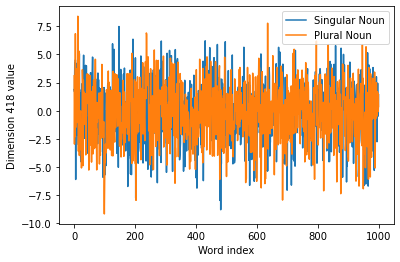

In [116]:
plt.plot(range(len(sg_n_we)), sg_n_we.loc[:, '418'], label='Singular Noun')
plt.plot(range(len(sg_n_we)), pl_n_we.loc[:, '418'][:len(sg_n_we)], label='Plural Noun')
plt.xlabel('Word index')
plt.ylabel('Dimension 418 value')
plt.legend()

In [85]:
sg_pl_n_we.loc[:, '418'].sort_values()[-10:]

réflexions      6.190972
dizaine         6.195989
herbe           6.214879
circonstance    6.359576
consciences     6.782515
accords         6.850119
cons            6.913197
centaine        7.486449
paroles         7.780978
adresses        8.400760
Name: 418, dtype: float64

In [86]:
sg_pl_n_we.loc[:, '418'].sort_values()[:10]

blessures   -9.184031
laine       -8.813732
jupe        -7.980783
chutes      -7.975482
plis        -7.950732
col         -7.772820
talons      -7.386537
seins       -7.129294
poitrine    -7.072843
vitesses    -6.948288
Name: 418, dtype: float64

Dimension 215

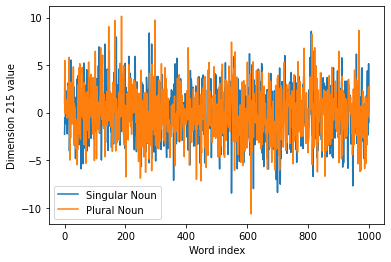

In [87]:
plt.plot(range(len(sg_n_we)), sg_n_we.loc[:, '215'], label='Singular Noun')
plt.plot(range(len(sg_n_we)), pl_n_we.loc[:, '215'][:len(sg_n_we)], label='Plural Noun')
plt.xlabel('Word index')
plt.ylabel('Dimension 215 value')
plt.legend()

In [88]:
sg_pl_n_we.loc[:, '215'].sort_values()[-10:]

milliers       7.410039
chauffeur      7.949478
samedis        8.232465
dimanche       8.378491
samedi         8.553403
wagons         8.656518
camions        9.048304
centaines      9.691566
dizaines       9.737687
chauffeurs    10.136073
Name: 215, dtype: float64

In [89]:
sg_pl_n_we.loc[:, '215'].sort_values()[:10]

opinions   -10.646559
menton      -8.456471
poitrine    -8.390445
opinion     -7.993327
visage      -7.702073
portrait    -7.521085
idées       -7.185877
figure      -7.104073
poing       -7.042628
hanches     -7.005396
Name: 215, dtype: float64

Dimension 453

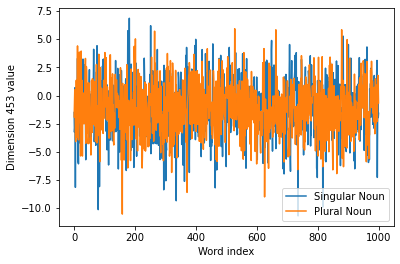

In [90]:
plt.plot(range(len(sg_n_we)), sg_n_we.loc[:, '453'], label='Singular Noun')
plt.plot(range(len(sg_n_we)), pl_n_we.loc[:, '453'][:len(sg_n_we)], label='Plural Noun')
plt.xlabel('Word index')
plt.ylabel('Dimension 453 value')
plt.legend()

In [91]:
sg_pl_n_we.loc[:, '453'].sort_values()[-10:]

gendarme    4.988193
chocs       5.026454
taxi        5.267073
crises      5.712227
chemise     5.745047
phares      5.833425
taxis       5.838516
matins      5.927477
crise       6.197182
chienne     6.859229
Name: 453, dtype: float64

In [92]:
sg_pl_n_we.loc[:, '453'].sort_values()[:10]

présent     -10.688568
cartons     -10.525474
bande       -10.130072
seconde      -9.909966
espèce       -9.342473
paires       -9.001535
fins         -8.593749
fins         -8.593749
doute        -8.370351
intention    -8.196182
Name: 453, dtype: float64

Dimension 14

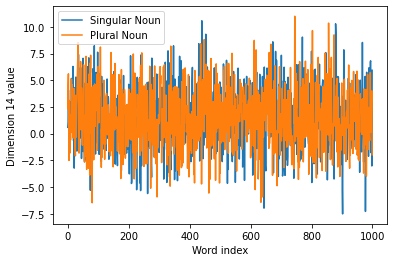

In [93]:
plt.plot(range(len(sg_n_we)), sg_n_we.loc[:, '14'], label='Singular Noun')
plt.plot(range(len(sg_n_we)), pl_n_we.loc[:, '14'][:len(sg_n_we)], label='Plural Noun')
plt.xlabel('Word index')
plt.ylabel('Dimension 14 value')
plt.legend()

In [94]:
sg_pl_n_we.loc[:, '14'].sort_values()[-10:]

idées        8.819974
retraite     9.044084
talents      9.251905
inconnue     9.310341
talent       9.462494
rêves        9.654068
taille      10.288196
sourires    10.351396
humeur      10.572078
qualités    10.996766
Name: 14, dtype: float64

In [95]:
sg_pl_n_we.loc[:, '14'].sort_values()[:10]

tout           -7.516728
égard          -7.284020
passage        -6.974144
bains          -6.476223
parois         -6.424981
dispositions   -5.924611
passages       -5.919564
côté           -5.607656
instructions   -5.562796
coupe          -5.334624
Name: 14, dtype: float64

Dimension 51

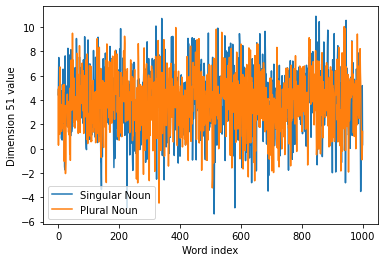

In [96]:
plt.plot(range(len(sg_n_we)), sg_n_we.loc[:, '51'], label='Singular Noun')
plt.plot(range(len(sg_n_we)), pl_n_we.loc[:, '51'][:len(sg_n_we)], label='Plural Noun')
plt.xlabel('Word index')
plt.ylabel('Dimension 51 value')
plt.legend()

In [97]:
sg_pl_n_we.loc[:, '51'].sort_values()[-10:]

colonne        9.875505
villas         9.892974
manière        9.915463
forêts         9.963669
vies          10.045238
enfer         10.090341
souffrance    10.450445
violence      10.555352
expression    10.712020
solitude      10.893773
Name: 51, dtype: float64

In [98]:
sg_pl_n_we.loc[:, '51'].sort_values()[:10]

lycée      -5.364751
contact    -4.880090
mouchoir   -4.860706
ennemies   -4.473399
étudiant   -3.517954
pli        -3.485327
carton     -3.346425
lycées     -3.225104
crayons    -2.813531
ville      -2.803459
Name: 51, dtype: float64

Dimension for largest correlation with "nb"

Dimension 310

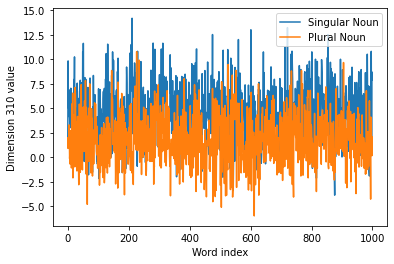

In [99]:
plt.plot(range(len(sg_n_we)), sg_n_we.loc[:, '310'], label='Singular Noun')
plt.plot(range(len(sg_n_we)), pl_n_we.loc[:, '310'][:len(sg_n_we)], label='Plural Noun')
plt.xlabel('Word index')
plt.ylabel('Dimension 310 value')
plt.legend()

In [100]:
sg_pl_n_we.loc[:, '310'].sort_values()[-10:]

calme          11.550736
article        11.632575
détail         11.645336
direction      11.658642
ministre       12.018818
sou            12.525866
juge           12.530373
nom            13.014243
principe       13.236145
commissaire    14.191738
Name: 310, dtype: float64

In [101]:
sg_pl_n_we.loc[:, '310'].sort_values()[:10]

opinions    -5.967048
lunettes    -5.083002
assiettes   -4.786969
juifs       -4.517591
étrangers   -4.254983
péchés      -4.043531
messages    -4.040105
inconnus    -4.017838
lapins      -3.988821
marchands   -3.920392
Name: 310, dtype: float64

Dimension 54

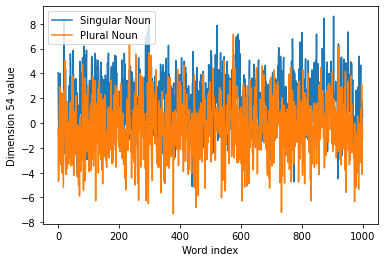

In [102]:
plt.plot(range(len(sg_n_we)), sg_n_we.loc[:, '54'], label='Singular Noun')
plt.plot(range(len(sg_n_we)), pl_n_we.loc[:, '54'][:len(sg_n_we)], label='Plural Noun')
plt.xlabel('Word index')
plt.ylabel('Dimension 54 value')
plt.legend()

In [103]:
sg_pl_n_we.loc[:, '54'].sort_values()[-10:]

sommeil     7.168465
médecin     7.178248
rêve        7.298036
voie        7.348004
douleur     7.395598
maladie     7.876612
droit       8.174099
allemand    8.252660
séjour      8.461544
train       8.613577
Name: 54, dtype: float64

In [105]:
sg_pl_n_we.loc[:, '54'].sort_values()[:10]

fois         -7.326514
présences    -7.192498
incidents    -6.807852
divisions    -6.497854
échelles     -6.329957
occasions    -6.272720
directions   -6.269876
sexes        -6.266834
boutons      -6.264966
crises       -6.230406
Name: 54, dtype: float64

Dimension 288

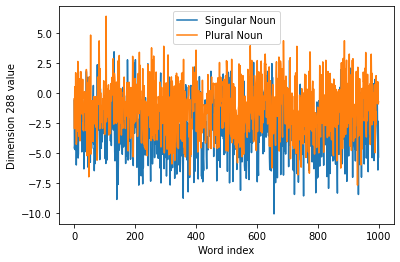

In [106]:
plt.plot(range(len(sg_n_we)), sg_n_we.loc[:, '288'], label='Singular Noun')
plt.plot(range(len(sg_n_we)), pl_n_we.loc[:, '288'][:len(sg_n_we)], label='Plural Noun')
plt.xlabel('Word index')
plt.ylabel('Dimension 288 value')
plt.legend()

In [107]:
sg_pl_n_we.loc[:, '288'].sort_values()[-10:]

fusils      3.566502
courants    3.757580
prénoms     3.882285
disques     3.892021
mèches      3.940004
balcons     4.338220
poignets    4.350522
thés        4.351564
armoires    4.818262
blonds      6.384378
Name: 288, dtype: float64

In [108]:
sg_pl_n_we.loc[:, '288'].sort_values()[:10]

peine      -10.051662
carrière    -8.846559
figure      -8.744933
rang        -8.556915
vertu       -8.435489
prison      -8.432453
statue      -8.321226
régime      -8.295894
fonction    -8.215627
menace      -8.082767
Name: 288, dtype: float64

Dimension 278

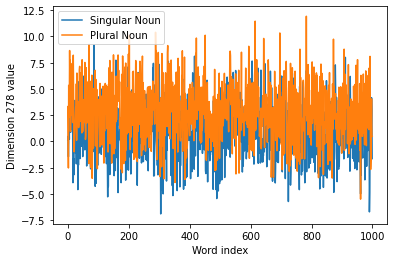

In [109]:
plt.plot(range(len(sg_n_we)), sg_n_we.loc[:, '278'], label='Singular Noun')
plt.plot(range(len(sg_n_we)), pl_n_we.loc[:, '278'][:len(sg_n_we)], label='Plural Noun')
plt.xlabel('Word index')
plt.ylabel('Dimension 278 value')
plt.legend()

In [110]:
sg_pl_n_we.loc[:, '278'].sort_values()[-10:]

attitudes      9.242421
taches         9.738168
patrons        9.808451
grosses        9.844550
choses        10.097820
immeubles     10.112993
pompes        10.329314
directeurs    10.395084
ordres        11.454746
ronds         11.924365
Name: 278, dtype: float64

In [111]:
sg_pl_n_we.loc[:, '278'].sort_values()[:10]

déjeuner     -6.925068
étranger     -6.730564
prisonnier   -5.741570
voyageurs    -5.514399
lecture      -5.459531
calme        -5.295695
famille      -5.177739
dîner        -5.012671
voyageur     -5.011798
charme       -4.890461
Name: 278, dtype: float64

Dimension 172

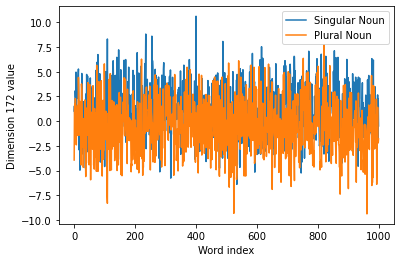

In [112]:
plt.plot(range(len(sg_n_we)), sg_n_we.loc[:, '172'], label='Singular Noun')
plt.plot(range(len(sg_n_we)), pl_n_we.loc[:, '172'][:len(sg_n_we)], label='Plural Noun')
plt.xlabel('Word index')
plt.ylabel('Dimension 172 value')
plt.legend()

In [113]:
sg_pl_n_we.loc[:, '172'].sort_values()[-10:]

retraite     7.084777
sou          7.132194
cellule      7.222964
oeuf         7.544065
sels         7.750596
larme        8.078182
bout         8.323427
cuisse       8.611100
coude        8.822691
genou       10.627484
Name: 172, dtype: float64

In [114]:
sg_pl_n_we.loc[:, '172'].sort_values()[:10]

voyageurs   -9.391284
marques     -9.333849
bons        -8.317432
bonnes      -7.584717
tailles     -7.387342
peintres    -6.907899
trains      -6.826825
magasins    -6.684028
poètes      -6.607919
écoles      -6.514872
Name: 172, dtype: float64

From the above results, it can be seen that for dimensions with a low correlation  with "nb", the values of Singular and Pluaral Noun are almost coincident. However, for dimensions with a high correlation  with "nb", the values of Singular and Plural Noun are significantly different .
At the same time, we also observed that for dimensions with high correlation with "nb", when we extract the 10 highest and lowest values, there are 10 Singular Nouns and Plural Nouns respectively. However, the low correlation  with "nb" does not have this observation.

Correlation between dimensions

We choose 10 dimensions which 5 for lower correlation (418, 215, 453, 14, 51)  with "nb", 5 for largest correlation (310, 54, 288, 278, 172) with "nb" , to see the correlation between them. We assume that these have largest correlation with "nb" have larger correlation between themselves comparing with these have smallest correlation with "nb"

In [115]:
sg_pl_n_we.loc[:, [ '310', '54', '288', '278', '172','418', '215','453','14','51']].corr()

,310,54,288,278,172,418,215,453,14,51
310,1.000000,0.314957,-0.358493,-0.181509,0.230552,0.074038,0.173220,-0.091632,-0.185281,0.069749
54,0.314957,1.000000,-0.203563,-0.308686,0.153331,-0.001085,0.065784,-0.016140,-0.071510,-0.107255
288,-0.358493,-0.203563,1.000000,0.064219,-0.237740,0.045837,-0.073136,0.065536,-0.134145,-0.032164
278,-0.181509,-0.308686,0.064219,1.000000,-0.237038,-0.033434,-0.023537,0.016716,-0.046261,0.061414
172,0.230552,0.153331,-0.237740,-0.237038,1.000000,-0.090239,-0.026350,-0.078912,0.040525,-0.023462
418,0.074038,-0.001085,0.045837,-0.033434,-0.090239,1.000000,0.009559,-0.089462,0.003935,0.238553
215,0.173220,0.065784,-0.073136,-0.023537,-0.026350,0.009559,1.000000,0.067114,-0.098475,-0.005059
453,-0.091632,-0.016140,0.065536,0.016716,-0.078912,-0.089462,0.067114,1.000000,-0.016105,0.022582
14,-0.185281,-0.071510,-0.134145,-0.046261,0.040525,0.003935,-0.098475,-0.016105,1.000000,0.059133
51,0.069749,-0.107255,-0.032164,0.061414,-0.023462,0.238553,-0.005059,0.022582,0.059133,1.000000


We see that dimensions 310, 54, 288, 278, 172 have a stronger correlation beetween them, and for 418, 215, 453, 14, 51, they  are neither highly correlated with other dimensions nor highly correlated with each other.

From the above results we can conclude that maybe one or several of these vectors ： 310， 54， 288， 278， 172 encode the information of Singular and Plural Noun.
